<a href="https://colab.research.google.com/github/Dicti93/MLSEM/blob/master/6.%20CNN/CNN_SEQUENCE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data already downloaded.


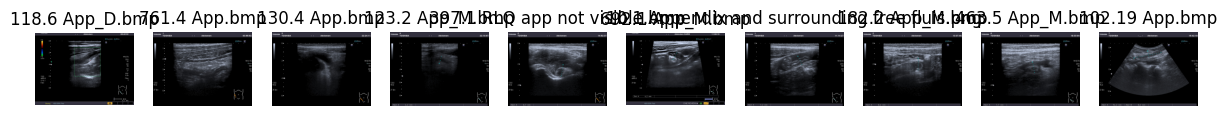

Loading and preprocessing data...
Loaded and preprocessed data with 760 entries
Processing and saving images...


Processing images: 100%|██████████| 2098/2098 [00:36<00:00, 58.04it/s]


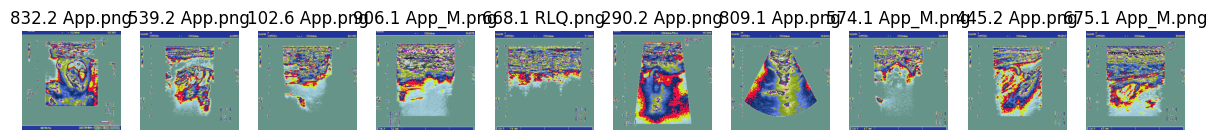

Initializing MedicalImagesDataset...
Found 2097 files in /content/US_Pictures/US_Pictures/Preprocessed/.
Total images found before matching: 2097
Total US numbers successfully mapped to images: 579
Total images successfully mapped to a US_NUMBER: 1727
Dataset initialized with 1727 samples
Initializing PatientDataset...
Initialized PatientDataset with 530 patients.
Training set size: 340
Validation set size: 84
Test set size: 106


100%|██████████| 22/22 [00:50<00:00,  2.28s/it]


Before training
Train Loss: 0.6986, Train Acc: 0.3324, Train ROC AUC: 0.7148
Val Acc: 0.3214, Val ROC AUC: 0.6296


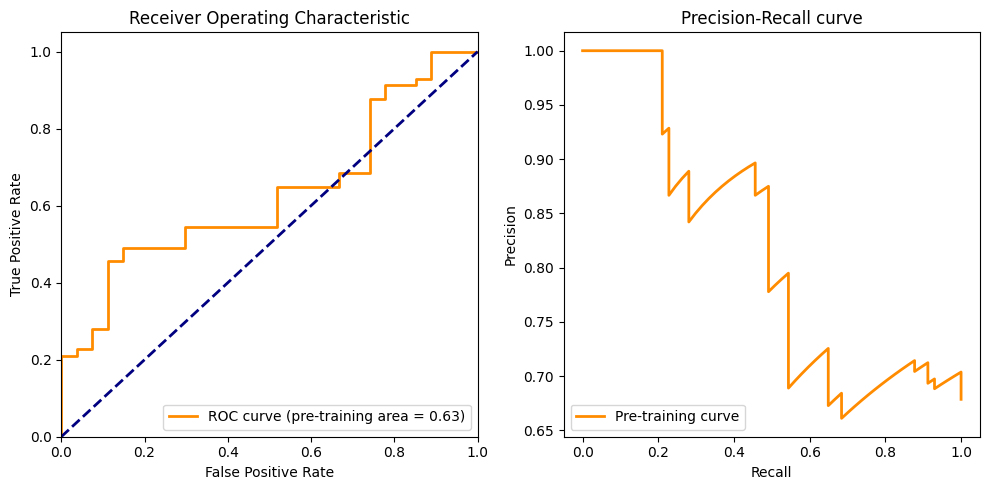

Epoch 1/10 [Validation]: 100%|██████████| 6/6 [00:08<00:00,  1.40s/it]


Epoch 1/10
Train Loss: 0.8679, Train Acc: 0.4441, Train ROC AUC: 0.7028
Val Acc: 0.7857, Val ROC AUC: 0.8532


Epoch 2/10 [Validation]: 100%|██████████| 6/6 [00:08<00:00,  1.39s/it]


Epoch 2/10
Train Loss: 0.6818, Train Acc: 0.6735, Train ROC AUC: 0.3502
Val Acc: 0.6786, Val ROC AUC: 0.5010


Epoch 3/10 [Validation]: 100%|██████████| 6/6 [00:08<00:00,  1.46s/it]


Epoch 3/10
Train Loss: 0.6489, Train Acc: 0.6676, Train ROC AUC: 0.7592
Val Acc: 0.6786, Val ROC AUC: 1.0000


Epoch 4/10 [Validation]: 100%|██████████| 6/6 [00:08<00:00,  1.39s/it]


Epoch 4/10
Train Loss: 0.5581, Train Acc: 0.7235, Train ROC AUC: 0.9399
Val Acc: 0.7500, Val ROC AUC: 1.0000


Epoch 5/10 [Validation]: 100%|██████████| 6/6 [00:07<00:00,  1.33s/it]


Epoch 5/10
Train Loss: 0.3892, Train Acc: 0.8706, Train ROC AUC: 0.9918
Val Acc: 0.8214, Val ROC AUC: 1.0000


Epoch 6/10 [Validation]: 100%|██████████| 6/6 [00:08<00:00,  1.40s/it]


Epoch 6/10
Train Loss: 0.2352, Train Acc: 0.9294, Train ROC AUC: 0.9989
Val Acc: 0.9881, Val ROC AUC: 1.0000


Epoch 7/10 [Validation]: 100%|██████████| 6/6 [00:08<00:00,  1.40s/it]


Epoch 7/10
Train Loss: 0.1323, Train Acc: 0.9706, Train ROC AUC: 0.9993
Val Acc: 1.0000, Val ROC AUC: 1.0000


Epoch 8/10 [Validation]: 100%|██████████| 6/6 [00:08<00:00,  1.39s/it]


Epoch 8/10
Train Loss: 0.0731, Train Acc: 0.9912, Train ROC AUC: 0.9999
Val Acc: 1.0000, Val ROC AUC: 1.0000
Early stopping triggered


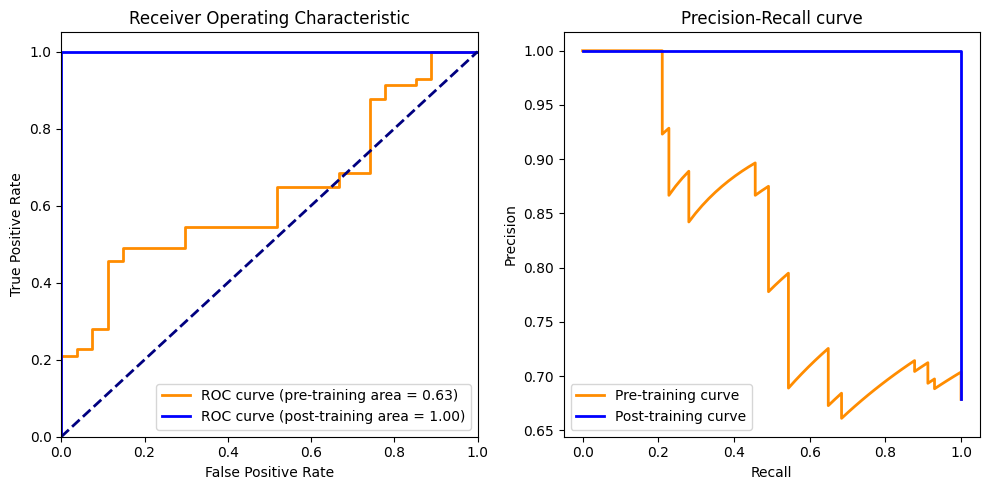

Testing: 100%|██████████| 7/7 [00:17<00:00,  2.49s/it]


Test Acc: 1.0000, Test ROC AUC: 1.0000
Patient ID: 119, True Label: 1, Predicted Label: 1
Patient ID: 123, True Label: 1, Predicted Label: 1
Patient ID: 197, True Label: 1, Predicted Label: 1
Patient ID: 353, True Label: 0, Predicted Label: 1
Patient ID: 449, True Label: 1, Predicted Label: 1
Patient ID: 250, True Label: 0, Predicted Label: 0
Patient ID: 334, True Label: 1, Predicted Label: 1
Patient ID: 921, True Label: 1, Predicted Label: 1
Patient ID: 72, True Label: 0, Predicted Label: 1
Patient ID: 88, True Label: 1, Predicted Label: 1
Patient ID: 748, True Label: 1, Predicted Label: 1
Patient ID: 515, True Label: 1, Predicted Label: 1
Patient ID: 143, True Label: 1, Predicted Label: 1
Patient ID: 474, True Label: 1, Predicted Label: 1
Patient ID: 759, True Label: 1, Predicted Label: 1
Patient ID: 65, True Label: 1, Predicted Label: 1
Patient ID: 101, True Label: 1, Predicted Label: 1
Patient ID: 67, True Label: 1, Predicted Label: 1
Patient ID: 189, True Label: 1, Predicted Label

In [ ]:
# ### Imports and Setup
# Importing necessary libraries and setting up configurations

import os
import re
import random
import logging
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from collections import defaultdict
from tqdm import tqdm
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, precision_recall_curve
from torch.utils.data import DataLoader, Dataset, random_split, Subset
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.transforms.functional as TF
from torchvision import datasets, transforms
from torch.utils.tensorboard import SummaryWriter
from sklearn.model_selection import StratifiedKFold, train_test_split

# Setup logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# TensorBoard writer
writer = SummaryWriter()

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 230)

# Seed settings
random.seed(1234)
np.random.seed(1234)
torch.manual_seed(1234)
torch.cuda.manual_seed_all(1234)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

# Constants
RAW_IMAGE_PATH = '/content/US_Pictures/US_Pictures/'
IMAGE_PATH = '/content/US_Pictures/US_Pictures/Preprocessed/'
ZIP_PATH = '/content/US_Pictures.zip'
DATA_URL = "https://raw.githubusercontent.com/Dicti93/MLSEM/master/2.%20Data%20and%20Description/data.csv"
MODEL_PATH = 'model.pth'
LEARNING_RATE = 0.0001
NUM_EPOCHS = 10
BATCH_SIZE = 16
THRESHOLD = 10
EARLY_STOPPING_PATIENCE = 5

# Define transformations
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.7105, 0.7467, 0.3402], std=[0.2721, 0.3070, 0.2304])
])

# ### Directory Setup and Data Download
# This section ensures that the required directories exist and downloads the data if necessary.

# Ensure the required directories exist
def ensure_directory_exists(path):
    """Create directory if it does not exist."""
    if not os.path.exists(path):
        os.makedirs(path)
        logger.info(f"Directory created: {path}")
        print(f"Directory created: {path}")

# Download and extract data if necessary
def download_and_extract_data():
    """Download and extract data if not already present."""
    if not os.listdir(RAW_IMAGE_PATH) or not any(f.endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')) for f in os.listdir(RAW_IMAGE_PATH)):
        logger.info("Downloading data...")
        print("Downloading data...")
        os.system(f'wget -O {ZIP_PATH} https://zenodo.org/records/7669442/files/US_Pictures.zip')
        os.system(f'unzip -q {ZIP_PATH} -d /content/US_Pictures/')
    else:
        logger.info("Data already downloaded.")
        print("Data already downloaded.")

# ### Data Display
# This function helps visualize a few images from the dataset.

def display_images(image_path, num_images=10):
    """Display a specified number of images from a directory."""
    files = [f for f in os.listdir(image_path) if f.endswith(('.png', '.bmp'))][:num_images]
    if not files:
        logger.warning("No image files found in the directory.")
        print("No image files found in the directory.")
        return
    fig, axs = plt.subplots(1, num_images, figsize=(15, 5))
    for i, file in enumerate(files):
        img = Image.open(os.path.join(image_path, file))
        axs[i].imshow(img)
        axs[i].axis('off')
        axs[i].set_title(file)
    plt.show()

# ### Data Loading and Preprocessing
# This function loads and preprocesses the dataset.

def load_and_preprocess_data(data_url):
    """Load and preprocess the dataset."""
    print("Loading and preprocessing data...")
    data = pd.read_csv(data_url, delimiter=';')
    columns_to_drop = [
        'Age', 'BMI', 'Sex', 'Height', 'Weight', 'Length_of_Stay', 'Management', 'Severity',
        'Diagnosis_Presumptive', 'Alvarado_Score', 'Paedriatic_Appendicitis_Score', 'Appendix_on_US',
        'Appendix_Diameter', 'Migratory_Pain', 'Lower_Right_Abd_Pain', 'Contralateral_Rebound_Tenderness',
        'Coughing_Pain', 'Nausea', 'Loss_of_Appetite', 'Body_Temperature', 'WBC_Count', 'Neutrophil_Percentage',
        'Segmented_Neutrophils', 'Neutrophilia', 'RBC_Count', 'Hemoglobin', 'RDW', 'Thrombocyte_Count',
        'Ketones_in_Urine', 'RBC_in_Urine', 'WBC_in_Urine', 'CRP', 'Dysuria', 'Stool', 'Peritonitis',
        'Psoas_Sign', 'Ipsilateral_Rebound_Tenderness', 'US_Performed', 'Free_Fluids', 'Appendix_Wall_Layers',
        'Target_Sign', 'Appendicolith', 'Perfusion', 'Perforation', 'Surrounding_Tissue_Reaction', 'Appendicular_Abscess',
        'Abscess_Location', 'Pathological_Lymph_Nodes', 'Lymph_Nodes_Location', 'Bowel_Wall_Thickening',
        'Conglomerate_of_Bowel_Loops', 'Ileus', 'Coprostasis', 'Meteorism', 'Enteritis', 'Gynecological_Findings'
    ] + [f'Unnamed: {i}' for i in range(58, 69)]
    data.drop(columns=columns_to_drop, inplace=True)
    data['Diagnosis'].replace({'appendicitis': 1, 'no appendicitis': 0, np.nan: 0}, inplace=True)
    data.dropna(subset=['US_Number'], inplace=True)
    data['US_Number'] = data['US_Number'].astype(int)
    data['Diagnosis'] = data['Diagnosis'].astype(int)
    id_to_label = {int(row['US_Number']): row['Diagnosis'] for index, row in data.iterrows()}
    print(f"Loaded and preprocessed data with {len(id_to_label)} entries")
    return id_to_label

# Process and save images
def process_and_save_images(root_dir, output_dir, transform):
    ensure_directory_exists(output_dir)
    print("Processing and saving images...")
    for filename in tqdm(os.listdir(root_dir), desc="Processing images"):
        file_path = os.path.join(root_dir, filename)
        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
            try:
                with Image.open(file_path).convert('RGB') as img:
                    transformed_tensor = transform(img)
                    transformed_img = TF.to_pil_image(transformed_tensor)
                    output_file_path = os.path.join(output_dir, os.path.splitext(filename)[0] + '.png')
                    transformed_img.save(output_file_path, format='PNG')
            except Exception as e:
                logger.error(f"Failed to process {filename}: {str(e)}")
                print(f"Failed to process {filename}: {str(e)}")

# ### Medical Images Dataset
# This class handles the loading and transformation of medical images.

class MedicalImagesDataset(Dataset):
    def __init__(self, root_dir, labels_dict):
        """Initialize the dataset with images and labels."""
        self.root_dir = root_dir
        self.labels_dict = labels_dict
        self.filename_mapping = {}
        self.unique_us_numbers = set()
        self.diagnosis_count_per_image = defaultdict(int)
        self.num_images_found = 0

        print("Initializing MedicalImagesDataset...")

        # Debug: Check if root_dir exists and list files
        if not os.path.exists(root_dir):
            print(f"Directory {root_dir} does not exist.")
        else:
            files = os.listdir(root_dir)
            print(f"Found {len(files)} files in {root_dir}.")

        for filename in os.listdir(root_dir):
            self.num_images_found += 1
            base_name = filename.split(' ')[0]
            match = re.match(r"([0-9]+(?:\.[0-9]+)?)", base_name)
            if match:
                image_number = int(match.group(1).split('.')[0])
                label = labels_dict.get(image_number)
                if label is not None:
                    self.unique_us_numbers.add(image_number)
                    self.diagnosis_count_per_image[label] += 1
                    image_path = os.path.join(root_dir, filename)

                    # Debug: Check if image can be opened
                    try:
                        image = Image.open(image_path).convert('RGB')
                        self.filename_mapping[filename] = (transform(image), label)
                    except Exception as e:
                        print(f"Error loading image {image_path}: {e}")
            else:
                print(f"No match found for file {filename}")

        # Debug: Print out some statistics
        print(f"Total images found before matching: {self.num_images_found}")
        print(f"Total US numbers successfully mapped to images: {len(self.unique_us_numbers)}")
        print(f"Total images successfully mapped to a US_NUMBER: {len(self.filename_mapping)}")

    def __len__(self):
        """Return the length of the dataset."""
        return len(self.filename_mapping)

    def __getitem__(self, idx):
        """Get an item from the dataset by index."""
        filename = list(self.filename_mapping.keys())[idx]
        image, label = self.filename_mapping[filename]
        return image, label, filename

    def print_dataset_statistics(self):
        """Print statistics about the dataset."""
        logger.info(f"Total images found before matching: {self.num_images_found}")
        logger.info(f"Total US numbers successfully mapped to images: {len(self.unique_us_numbers)}")
        logger.info(f"Total images successfully mapped to a US_NUMBER: {len(self.filename_mapping)}")
        for label, count in self.diagnosis_count_per_image.items():
            logger.info(f"Label {label}: {count} images")

# ### Data Augmentation and Dataset Splitting
# This section handles the augmentation of images and splitting the dataset into training and testing sets.

def augment_image(image, transform, times):
    """Apply augmentations to an image a specified number of times."""
    possible_transformations = [
        lambda x: TF.rotate(x, -10),
        lambda x: TF.rotate(x, -5),
        lambda x: TF.rotate(x, 5),
        lambda x: TF.rotate(x, 10),
        lambda x: TF.affine(x, translate=(0.1, 0.1), scale=1.05, angle=0, shear=0),
        lambda x: TF.affine(x, translate=(0.1, 0.1), scale=1.1, angle=0, shear=0),
        lambda x: TF.affine(x, translate=(-0.1, -0.1), scale=0.95, angle=0, shear=0),
        lambda x: TF.affine(x, translate=(-0.1, -0.1), scale=0.9, angle=0, shear=0),
        lambda x: TF.affine(x, angle=0, translate=(0, 0), scale=1.0, shear=5)
    ]
    selected_transforms = random.sample(possible_transformations, min(len(possible_transformations), times))
    augmented_images = [transform(transform(image)) for transform in selected_transforms]
    return augmented_images

def create_train_test_datasets(dataset, test_size=0.2, augment_times=2):
    """Create training and testing datasets with augmentation."""
    images, labels = [], []
    for img, label, filename in dataset:
        images.append((img, label, filename))
        labels.append(label)

    train_images, test_images, train_labels, test_labels = train_test_split(
        images, labels, test_size=test_size, stratify=labels, random_state=1234
    )

    augmented_images = []
    for img, label, filename in train_images:
        if label == 0:
            aug_imgs = augment_image(TF.to_pil_image(img), transform, augment_times)
            augmented_images.extend([(aug_img, label, f"{filename}_aug{i}") for i, aug_img in enumerate(aug_imgs)])

    train_images.extend(augmented_images)

    train_dataset = DatasetSubset(train_images)
    test_dataset = DatasetSubset(test_images)

    return train_dataset, test_dataset

class DatasetSubset(Dataset):
    def __init__(self, data):
        """Initialize the dataset subset."""
        self.data = data

    def __len__(self):
        """Return the length of the dataset subset."""
        return len(self.data)

    def __getitem__(self, idx):
        """Get an item from the dataset subset by index."""
        return self.data[idx]

def pad_sequence(sequences):
    """Pad sequences to the same length."""
    max_len = max([seq.size(0) for seq in sequences])
    batch_size, c, h, w = sequences[0].size(0), sequences[0].size(1), sequences[0].size(2), sequences[0].size(3)
    padded_sequences = torch.zeros(len(sequences), max_len, c, h, w)
    for i, seq in enumerate(sequences):
        padded_sequences[i, :seq.size(0)] = seq
    return padded_sequences

def custom_collate_fn(batch):
    """Custom collate function for DataLoader."""
    images, labels, patient_ids = zip(*batch)
    padded_images = pad_sequence(images)
    labels = torch.tensor(labels)
    patient_ids = torch.tensor(patient_ids)
    return padded_images, labels, patient_ids

# ### Patient Dataset and DataLoader Creation
# This section handles the creation of patient datasets and DataLoaders.

class PatientDataset(Dataset):
    def __init__(self, dataset):
        """Initialize the patient dataset."""
        self.dataset = dataset
        self.patient_data = defaultdict(list)

        print("Initializing PatientDataset...")
        for img, label, filename in dataset:
            patient_id = int(filename.split('.')[0])
            self.patient_data[patient_id].append((img, label, filename))

        self.patient_ids = list(self.patient_data.keys())
        print(f"Initialized PatientDataset with {len(self.patient_ids)} patients.")

    def __len__(self):
        """Return the length of the patient dataset."""
        return len(self.patient_ids)

    def __getitem__(self, idx):
        """Get an item from the patient dataset by index."""
        patient_id = self.patient_ids[idx]
        patient_images = [x[0] for x in self.patient_data[patient_id]]
        patient_images = [img if isinstance(img, torch.Tensor) else transform(img) for img in patient_images]
        patient_label = self.patient_data[patient_id][0][1]
        patient_images = torch.stack(patient_images)
        return patient_images, patient_label, patient_id

def create_dataloaders(dataset, batch_size, n_splits=5):
    """Create DataLoaders for training, validation, and testing."""
    skf = StratifiedKFold(n_splits=n_splits)
    patient_ids = np.array(dataset.patient_ids)
    labels = np.array([dataset.patient_data[pid][0][1] for pid in patient_ids])

    for train_index, test_index in skf.split(patient_ids, labels):
        train_ids, test_ids = patient_ids[train_index], patient_ids[test_index]

        train_dataset = Subset(dataset, [dataset.patient_ids.index(pid) for pid in train_ids])
        test_dataset = Subset(dataset, [dataset.patient_ids.index(pid) for pid in test_ids])

        val_size = int(0.2 * len(train_dataset))
        train_size = len(train_dataset) - val_size
        train_dataset, val_dataset = random_split(train_dataset, [train_size, val_size])

        train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=custom_collate_fn)
        val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, collate_fn=custom_collate_fn)
        test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, collate_fn=custom_collate_fn)

        return train_loader, val_loader, test_loader, test_dataset

# ### Model Definition and Training
# This section defines the CNN model and functions for training and evaluating the model.

class SimpleCNN(nn.Module):
    def __init__(self):
        """Initialize the CNN model."""
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(64 * 64 * 64, 128)
        self.fc2 = nn.Linear(128, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        """Forward pass through the model."""
        batch_size, num_images, c, h, w = x.size()
        x = x.view(batch_size * num_images, c, h, w)
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(batch_size, num_images, -1)
        x = torch.mean(x, dim=1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x

def plot_roc_and_recall(preval_labels, preval_preds, postval_labels=None, postval_preds=None):
    """Plot ROC and Precision-Recall curves."""
    plt.figure(figsize=(10, 5))

    # ROC Curve
    fpr, tpr, _ = roc_curve(preval_labels, preval_preds)
    roc_auc = roc_auc_score(preval_labels, preval_preds)
    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (pre-training area = {roc_auc:.2f})')
    if postval_labels is not None and postval_preds is not None:
        fpr, tpr, _ = roc_curve(postval_labels, postval_preds)
        post_roc_auc = roc_auc_score(postval_labels, postval_preds)
        plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (post-training area = {post_roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')

    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(preval_labels, preval_preds)
    plt.subplot(1, 2, 2)
    plt.plot(recall, precision, color='darkorange', lw=2, label='Pre-training curve')
    if postval_labels is not None and postval_preds is not None:
        precision, recall, _ = precision_recall_curve(postval_labels, postval_preds)
        plt.plot(recall, precision, color='blue', lw=2, label='Post-training curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall curve')
    plt.legend(loc='lower left')

    plt.tight_layout()
    plt.show()

def train_model(model, criterion, optimizer, train_loader, val_loader, num_epochs, model_path, patience):
    """Train the model with early stopping."""
    best_val_roc_auc = 0
    early_stopping_counter = 0

    pretrain_loss = 0.0
    pretrain_preds, pretrain_labels = [], []
    for images, labels, _ in tqdm(train_loader):
        outputs = model(images)
        labels = labels.float().view(-1, 1)
        loss = criterion(outputs, labels)
        pretrain_loss += loss.item()
        pretrain_preds.extend(outputs.detach().cpu().numpy())
        pretrain_labels.extend(labels.detach().cpu().numpy())

    pretrain_loss /= len(train_loader)
    pretrain_acc = accuracy_score(pretrain_labels, (np.array(pretrain_preds) > 0.5).astype(int))
    pretrain_roc_auc = roc_auc_score(pretrain_labels, pretrain_preds)

    preval_preds, preval_labels = [], []
    with torch.no_grad():
        for images, labels, _ in val_loader:
            outputs = model(images)
            preval_preds.extend(outputs.detach().cpu().numpy())
            preval_labels.extend(labels.detach().cpu().numpy())

    preval_acc = accuracy_score(preval_labels, (np.array(preval_preds) > 0.5).astype(int))
    preval_roc_auc = roc_auc_score(preval_labels, preval_preds)

    print(f"Before training")
    print(f"Train Loss: {pretrain_loss:.4f}, Train Acc: {pretrain_acc:.4f}, Train ROC AUC: {pretrain_roc_auc:.4f}")
    print(f"Val Acc: {preval_acc:.4f}, Val ROC AUC: {preval_roc_auc:.4f}")

    plot_roc_and_recall(preval_labels, preval_preds)

    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
        train_preds, train_labels = [], []  # Corrected this line

        for images, labels, patient_ids in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs} [Training]"):
            optimizer.zero_grad()
            outputs = model(images)
            labels = labels.float().view(-1, 1)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()
            train_preds.extend(outputs.detach().cpu().numpy())
            train_labels.extend(labels.detach().cpu().numpy())

        train_loss /= len(train_loader)
        train_acc = accuracy_score(train_labels, (np.array(train_preds) > 0.5).astype(int))
        train_roc_auc = roc_auc_score(train_labels, train_preds)

        writer.add_scalar('Loss/train', train_loss, epoch)
        writer.add_scalar('Accuracy/train', train_acc, epoch)
        writer.add_scalar('ROC_AUC/train', train_roc_auc, epoch)

        model.eval()
        val_preds, val_labels = [], []
        with torch.no_grad():
            for images, labels, patient_ids in tqdm(val_loader, desc=f"Epoch {epoch+1}/{num_epochs} [Validation]"):
                outputs = model(images)
                val_preds.extend(outputs.detach().cpu().numpy())
                val_labels.extend(labels.detach().cpu().numpy())

        val_acc = accuracy_score(val_labels, (np.array(val_preds) > 0.5).astype(int))
        val_roc_auc = roc_auc_score(val_labels, val_preds)

        writer.add_scalar('Accuracy/val', val_acc, epoch)
        writer.add_scalar('ROC_AUC/val', val_roc_auc, epoch)

        logger.info(f"Epoch {epoch+1}/{num_epochs}")
        logger.info(f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, Train ROC AUC: {train_roc_auc:.4f}")
        logger.info(f"Val Acc: {val_acc:.4f}, Val ROC AUC: {val_roc_auc:.4f}")
        print(f"Epoch {epoch+1}/{num_epochs}")
        print(f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, Train ROC AUC: {train_roc_auc:.4f}")
        print(f"Val Acc: {val_acc:.4f}, Val ROC AUC: {val_roc_auc:.4f}")

        if val_roc_auc > best_val_roc_auc:
            best_val_roc_auc = val_roc_auc
            torch.save({
                'epoch': epoch + 1,
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'train_loss': train_loss,
                'train_acc': train_acc,
                'train_roc_auc': train_roc_auc,
                'val_acc': val_acc,
                'val_roc_auc': val_roc_auc,
            }, model_path)
            early_stopping_counter = 0
        else:
            early_stopping_counter += 1

        if early_stopping_counter >= patience:
            logger.info("Early stopping triggered")
            print("Early stopping triggered")
            break

    plot_roc_and_recall(preval_labels, preval_preds, val_labels, val_preds)

def test_model(model, test_loader):
    """Test the model on the test dataset."""
    model.eval()
    test_preds, test_labels = [], []
    with torch.no_grad():
        for images, labels, patient_ids in tqdm(test_loader, desc="Testing"):
            outputs = model(images)
            test_preds.extend(outputs.detach().cpu().numpy())
            test_labels.extend(labels.detach().cpu().numpy())

    test_acc = accuracy_score(test_labels, (np.array(test_preds) > 0.5).astype(int))
    test_roc_auc = roc_auc_score(test_labels, test_preds)
    logger.info(f"Test Acc: {test_acc:.4f}, Test ROC AUC: {test_roc_auc:.4f}")
    print(f"Test Acc: {test_acc:.4f}, Test ROC AUC: {test_roc_auc:.4f}")

def load_model(model_path):
    """Load the model from the specified path."""
    checkpoint = torch.load(model_path)
    model.load_state_dict(checkpoint['model_state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
    epoch = checkpoint['epoch']
    train_loss = checkpoint['train_loss']
    train_acc = checkpoint['train_acc']
    train_roc_auc = checkpoint['train_roc_auc']
    val_acc = checkpoint['val_acc']
    val_roc_auc = checkpoint['val_roc_auc']
    model.eval()
    return epoch, train_loss, train_acc, train_roc_auc, val_acc, val_roc_auc

def evaluate_model_on_testset_with_patient_ids(model, test_loader):
    """Evaluate the model on the test dataset with patient IDs."""
    model.eval()
    results = []

    with torch.no_grad():
        for images, labels, patient_ids in test_loader:
            outputs = model(images)
            predicted_labels = (outputs.detach().cpu().numpy() > 0.5).astype(int)
            true_labels = labels.detach().cpu().numpy()
            patient_ids = patient_ids.detach().cpu().numpy()

            for i in range(len(true_labels)):
                results.append((patient_ids[i], true_labels[i], predicted_labels[i][0]))

    for patient_id, true_label, predicted_label in results:
        logger.info(f"Patient ID: {patient_id}, True Label: {true_label}, Predicted Label: {predicted_label}")
        print(f"Patient ID: {patient_id}, True Label: {true_label}, Predicted Label: {predicted_label}")

# ## Main Execution
# The main execution section that sets up directories, downloads data, and trains/tests the model.

# Ensure directories exist and data is downloaded
ensure_directory_exists(RAW_IMAGE_PATH)
ensure_directory_exists(IMAGE_PATH)
download_and_extract_data()

# Display sample images
display_images(RAW_IMAGE_PATH)

# Load and preprocess data
id_to_label = load_and_preprocess_data(DATA_URL)

process_and_save_images(RAW_IMAGE_PATH, IMAGE_PATH, transform)

display_images(IMAGE_PATH)

# Initialize dataset
dataset = MedicalImagesDataset(IMAGE_PATH, id_to_label)
logger.info(f"Dataset initialized with {len(dataset)} samples")
print(f"Dataset initialized with {len(dataset)} samples")

# Check if dataset is empty
if len(dataset) == 0:
    raise ValueError("Dataset is empty. Please check the image loading process.")

# Create training and testing datasets
train_dataset, test_dataset = create_train_test_datasets(dataset, test_size=0.2)

# Create DataLoader for training and testing
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, collate_fn=custom_collate_fn)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, collate_fn=custom_collate_fn)

# Ensure test set contains both classes
test_labels = [label for _, label, _ in test_dataset]
assert len(set(test_labels)) == 2, "Test set does not contain both classes!"

# Initialize patient dataset
patient_dataset = PatientDataset(train_dataset)

# Print dataset structure for inspection
for idx in range(5):
    patient_images, patient_label, patient_id = patient_dataset[idx]
    logger.debug(f"Patient ID: {patient_id}, Label: {patient_label}, Images Tensor Shape: {patient_images.shape}")

# Create DataLoaders for training, validation, and testing
train_loader, val_loader, test_loader, test_dataset = create_dataloaders(patient_dataset, BATCH_SIZE)

# Print dataset sizes before training
logger.info(f"Training set size: {len(train_loader.dataset)}")
logger.info(f"Validation set size: {len(val_loader.dataset)}")
logger.info(f"Test set size: {len(test_loader.dataset)}")
print(f"Training set size: {len(train_loader.dataset)}")
print(f"Validation set size: {len(val_loader.dataset)}")
print(f"Test set size: {len(test_loader.dataset)}")

# Initialize model, loss function, and optimizer
model = SimpleCNN()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

# Train the model
train_model(model, criterion, optimizer, train_loader, val_loader, NUM_EPOCHS, MODEL_PATH, EARLY_STOPPING_PATIENCE)

# Test the model
test_model(model, test_loader)

# Load the model
epoch, train_loss, train_acc, train_roc_auc, val_acc, val_roc_auc = load_model(MODEL_PATH)

# Evaluate model on test set with patient IDs
test_loader_with_patient_ids = DataLoader(test_dataset, batch_size=1, shuffle=False, collate_fn=custom_collate_fn)
evaluate_model_on_testset_with_patient_ids(model, test_loader_with_patient_ids)

# Close TensorBoard writer
writer.close()
